In [1]:
!cd

C:\Users\j\K-Digital_multi\KDstudy\실습


In [ ]:
#!pip install PyMySQL==1.0.0

In [2]:
import pymysql.cursors
# Connect to the database

In [ ]:
# localhost or 127.0.0.1

In [3]:
# 커서 하나값이 출력됨

connection = pymysql.connect(host='127.0.0.1',
        user='me',
        password='1234',
        db='tip',
        charset='utf8',
        cursorclass=pymysql.cursors.DictCursor)
try:
    with connection.cursor() as cursor:
        # Read a single record
        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"
#         sql = "select count(total_bill) from tips where tip >= 7;" # 메모리 사용 제한을 위해 먼저 카운트값을 가져온다
        sql = "select total_bill from tips where tip >= 7;"
        cursor.execute(sql)
        result = cursor.fetchone()
        print(result)
#         for _ in range(3):
#             result = cursor.fetchone()
#             print(result)
finally:
    connection.close()

{'total_bill': 39.42}


In [1]:
import pandas as pd

In [5]:
# MySQL DB에서 데이터 받아와서 DataFrame에 저장

conn = pymysql.connect(host='localhost', user='me', 
                       password='1234', db='tip', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      sql = "select total_bill from tips where tip >= 7;"
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)
    # df.to_csv('파일명.csv')
finally:

   conn.close()

   total_bill
0       39.42
1       50.81
2       48.33


In [6]:
df

,total_bill
0,39.42
1,50.81
2,48.33


<AxesSubplot:>

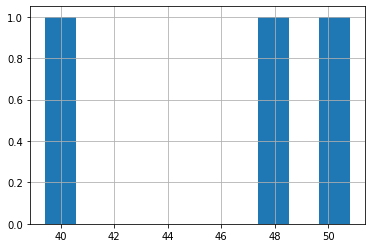

In [9]:
df['total_bill'].hist()

# 실습

In [5]:
sql2 = """select customers.state, customers.customerName, payments.checkNumber
from customers 
left join payments on customers.customerNumber = payments.customerNumber 
where payments.paymentDate >= '2004-10-06';"""

In [6]:
co2 = pymysql.connect(host='localhost', user='me', 
                       password='1234', db='classicmodels', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)

try:

   with co2.cursor() as curs:
#       sql = "select total_bill from tips where tip >= 7;"
      curs.execute(sql2)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)
    # df.to_csv('파일명.csv')
finally:

   co2.close()

       state                  customerName checkNumber
0       None             Atelier graphique    HQ336336
1       None             Atelier graphique    OM314933
2         NV            Signal Gift Stores    BO864823
3   Victoria    Australian Collectors, Co.    MA765515
4       None             La Rochelle Gifts    DB933704
..       ...                           ...         ...
84        MA              FunGiftIdeas.com    PE176846
85      None    Iberia Gift Imports, Corp.    GK294076
86        PA  Motor Mint Distributors Inc.     HS86661
87      None             Kelly's Gift Shop    EU531600
88      None             Kelly's Gift Shop     MN89921

[89 rows x 3 columns]


In [8]:
df.isnull().count()

state           89
customerName    89
checkNumber     89
dtype: int64